# CSCI B500 &mdash; Data Science: Using Pandas `DataFrames` to work with `csv` files

------        

## Python Standard Library Module `csv` 
* (Note: This is not a Pandas-specific feature)
* **`csv` module** provides functions for working with CSV files

### Writing to a CSV File
* `csv` module’s documentation recommends opening CSV files with the additional keyword argument `newline=''` to ensure that newlines are processed properly 

### Recall how the `with` statement works -- on your own, please review the notebook on File I/O (`csci500_file_io.ipynb`):
* Acquires a resource and assigns its corresponding object to a variable
* Allows the application to use the resource via that variable
* Implicitly the resource object’s **`close` method** to release the resource

In [1]:
import csv

In [2]:
with open('accounts.csv', mode='w', newline='') as accounts:
    writer = csv.writer(accounts)
    writer.writerow([100, 'Jones', 24.98])
    writer.writerow([200, 'Doe', 345.67])
    writer.writerow([300, 'White', 0.00])
    writer.writerow([400, 'Stone', -42.16])
    writer.writerow([500, 'Rich', 224.62])

* **`.csv` file extension** indicates a CSV-format file
* **`writer` function** returns an object that writes CSV data to the specified file object
* `writer`’s **`writerow` method** receives an iterable to store in the file
* By default, `writerow` delimits values with commas, but you can specify custom delimiters

In [3]:
# Mac & Linux Users: View file contents using the `cat` command
# preceded by an exclamation point, `!` (which provides an easy 
# way to execute command-line utilities from IPython!)
!cat accounts.csv

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
# Windows Users: View file contents using the `more` command
# (This operation won't really work on Mac or Linux, since the
#  equivalent `more` utility won't exit without hitting the 
#  <Enter> key, and so you may end up needing to stop and/or
#  reload the kernel)
!more accounts.csv

100,Jones,24.98
200,Doe,345.67
300,White,0.0
400,Stone,-42.16
500,Rich,224.62


* `writerow` calls above can be replaced with one **`writerows`** call that outputs a comma-separated list of iterables representing the records
* If you write data that contains commas in a given string, `writerow` encloses that string in double quotes to indicate a _single_ value

### Reading from a CSV File
* Read records from the file `accounts.csv` and display the contents of each record

In [5]:
with open('accounts.csv', 'r', newline='') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    reader = csv.reader(accounts)
    for record in reader:  
        account, name, balance = record
        print(f'{account:<10}{name:<10}{balance:>10}')

Account   Name         Balance
100       Jones          24.98
200       Doe           345.67
300       White            0.0
400       Stone         -42.16
500       Rich          224.62


* `csv` module’s **`reader` function** returns an object that reads CSV-format data from the specified file object
* Can iterate through the `reader` object one record of comma-delimited values at a time

------               

## Reading CSV Files into Pandas `DataFrames` 
* Here, we demonstrate pandas’ ability to load files in CSV format, then perform some basic data-analysis tasks

### Datasets
* Enormous variety of free datasets available online
* **Rdatasets repository** provides links to over 1100 free datasets in comma-separated values (CSV) format
> https://vincentarelbundock.github.io/Rdatasets/datasets.html
* **`pydataset` module** specifically for accessing Rdatasets
> https://github.com/iamaziz/PyDataset
* Another large source of datasets is
> https://github.com/awesomedata/awesome-public-datasets
* A commonly used machine-learning dataset for beginners is the **Titanic disaster dataset** (we'll look at this later in this unit)

### Working with Locally Stored CSV Files 
* File we'll process in this example

In [6]:
# Mac/Linux users only:
!cat accounts.csv

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
# Windows users only:
!more accounts.csv

100,Jones,24.98
200,Doe,345.67
300,White,0.0
400,Stone,-42.16
500,Rich,224.62


* Load a CSV dataset into a `DataFrame` with the pandas function **`read_csv`**
* `names` argument specifies the `DataFrame`’s column names
    * <span style="background: yellow;">IMPORTANT!</span> Without this argument, `read_csv` assumes that the CSV file’s first row is a comma-delimited list of column names

In [8]:
import pandas as pd

In [9]:
# `df` is a commonly used variable name for a DataFrame 
# (but you're welcome to use whatever variable makes the most sense)
df = pd.read_csv('accounts.csv', 
                 names=['account', 'name', 'balance'])

In [10]:
df

account   name  balance
0      100  Jones    24.98
1      200    Doe   345.67
2      300  White     0.00
3      400  Stone   -42.16
4      500   Rich   224.62

* To save a `DataFrame` to a file using CSV format, call `DataFrame` method **`to_csv`**
* `index=False` indicates that the row names (`0`–`4` at the left of the `DataFrame`’s output above are not written to the file
* Resulting file contains the column names as the first row

In [11]:
df.to_csv('accounts_from_dataframe.csv', index=False)

In [12]:
# Mac/Linux users only:
!cat accounts_from_dataframe.csv

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [13]:
# Windows users only:
!more accounts_from_dataframe.csv

account,name,balance
100,Jones,24.98
200,Doe,345.67
300,White,0.0
400,Stone,-42.16
500,Rich,224.62


------                 

## Reading the Titanic Disaster Dataset 
* Titanic disaster dataset is one of the most popular machine-learning datasets

### Loading the Titanic Dataset via a URL <span style="background: yellow;">(requires active internet connection, obviously)</span>
* Load the Titanic Disaster dataset directly from GitHub:

In [14]:
import pandas as pd

In [15]:
titanic = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/TitanicSurvival.csv')

### Viewing Some of the Rows in the Titanic Dataset
* Dataset contains over 1300 rows, each representing one passenger
* For large datasets, displaying a `DataFrame` shows only the first 30 rows, followed by “…” and the last 30 rows
* View the first five and last five rows with `DataFrame` methods **`head`** and **`tail`**
    * Both return five rows by default

In [16]:
pd.set_option('precision', 2)  # format for floating-point values

In [17]:
titanic.head() # also try titanic.head(10), titanic.head(20), etc...

Unnamed: 0 survived     sex    age passengerClass
0    Allen, Miss. Elisabeth Walton      yes  female  29.00            1st
1   Allison, Master. Hudson Trevor      yes    male   0.92            1st
2     Allison, Miss. Helen Loraine       no  female   2.00            1st
3  Allison, Mr. Hudson Joshua Crei       no    male  30.00            1st
4  Allison, Mrs. Hudson J C (Bessi       no  female  25.00            1st

In [18]:
titanic.tail()

Unnamed: 0 survived     sex   age passengerClass
1304       Zabour, Miss. Hileni       no  female  14.5            3rd
1305      Zabour, Miss. Thamine       no  female   NaN            3rd
1306  Zakarian, Mr. Mapriededer       no    male  26.5            3rd
1307        Zakarian, Mr. Ortin       no    male  27.0            3rd
1308         Zimmerman, Mr. Leo       no    male  29.0            3rd

* pandas adjusts each column’s width, based on the widest value in the column or based on the column name, whichever is wider
* The value in the age column of row `1305` is `NaN` (not a number), indicating a missing value in the dataset

### Customizing the Column Names
* First column has a strange name (`'Unnamed: 0'`)
* Can clean that up by setting the column names

In [19]:
titanic.columns = ['name', 'survived', 'sex', 'age', 'class']

In [20]:
titanic.head()

name survived     sex    age class
0    Allen, Miss. Elisabeth Walton      yes  female  29.00   1st
1   Allison, Master. Hudson Trevor      yes    male   0.92   1st
2     Allison, Miss. Helen Loraine       no  female   2.00   1st
3  Allison, Mr. Hudson Joshua Crei       no    male  30.00   1st
4  Allison, Mrs. Hudson J C (Bessi       no  female  25.00   1st

In [21]:
titanic.tail()

name survived     sex   age class
1304       Zabour, Miss. Hileni       no  female  14.5   3rd
1305      Zabour, Miss. Thamine       no  female   NaN   3rd
1306  Zakarian, Mr. Mapriededer       no    male  26.5   3rd
1307        Zakarian, Mr. Ortin       no    male  27.0   3rd
1308         Zimmerman, Mr. Leo       no    male  29.0   3rd

## Simple Data Analysis with the Titanic Disaster Dataset 
* Can use pandas to perform some simple analysis.
* Calling `describe` on a `DataFrame` containing both numeric and non-numeric columns produces descriptive statistics _only for the numeric columns_
    * in this case, just the `age` column

In [22]:
titanic.describe()

age
count  1046.00
mean     29.88
std      14.41
min       0.17
25%      21.00
50%      28.00
75%      39.00
max      80.00

* Discrepancy in the `count` (`1046`) vs. the dataset’s number of rows (1309—the last row’s index was `1308` when we called `tail`)
    * Only `1046` (the `count` above) of the records contained an age
    * Rest were _missing_ and marked as `NaN`
* When performing calculations, Pandas _ignores missing data (`NaN`) by default_
* For the `1046` people with valid ages
    * average (`mean`) age was `29.88` years old
    * youngest passenger (`min`) was just over two months old (`0.17 * 12` is `2.04`)
    *  oldest (`max`) was 80
    * Median age was `28` (indicated by the `50%` quartile)
    * `25%` quartile is the median age in the first half of the passengers (sorted by age)
    * `75%` quartile is the median of the second half of passengers

* Let’s say you want to determine some statistics about people who survived
* Can compare the `survived` column to `'yes'` to get a new `Series` containing `True/False` values, then use `describe` to summarize the results

In [23]:
titanic.survived == 'yes'

0        True
1        True
2       False
3       False
4       False
5        True
6        True
7       False
8        True
9       False
10      False
11       True
12       True
13       True
14       True
15      False
16      False
17       True
18       True
19      False
20       True
21       True
22       True
23       True
24       True
25      False
26       True
27       True
28       True
29       True
        ...  
1279    False
1280    False
1281    False
1282    False
1283    False
1284    False
1285    False
1286     True
1287    False
1288    False
1289    False
1290     True
1291    False
1292    False
1293    False
1294    False
1295    False
1296    False
1297    False
1298    False
1299    False
1300     True
1301    False
1302    False
1303    False
1304    False
1305    False
1306    False
1307    False
1308    False
Name: survived, Length: 1309, dtype: bool

In [24]:
# Side note: don't forget about the power of Boolean indexing!
titanic[titanic.survived == 'yes']

name survived     sex    age class
0       Allen, Miss. Elisabeth Walton      yes  female  29.00   1st
1      Allison, Master. Hudson Trevor      yes    male   0.92   1st
5                 Anderson, Mr. Harry      yes    male  48.00   1st
6     Andrews, Miss. Kornelia Theodos      yes  female  63.00   1st
8     Appleton, Mrs. Edward Dale (Cha      yes  female  53.00   1st
11    Astor, Mrs. John Jacob (Madelei      yes  female  18.00   1st
12      Aubart, Mme. Leontine Pauline      yes  female  24.00   1st
13         Barber, Miss. Ellen Nellie      yes  female  26.00   1st
14    Barkworth, Mr. Algernon Henry W      yes    male  80.00   1st
17    Baxter, Mrs. James (Helene DeLa      yes  female  50.00   1st
18              Bazzani, Miss. Albina      yes  female  32.00   1st
20      Beckwith, Mr. Richard Leonard      yes    male  37.00   1st
21     Beckwith, Mrs. Richard Leonard      yes  female  47.00   1st
22              Behr, Mr. Karl Howell      yes    male  26.00   1st
23              Bidois, Miss. Rosalie      yes  female  42.00   1st
24                  Bird, Miss. Ellen      yes  female  29.00   1st
26            Bishop, Mr. Dickinson H      yes    male  25.00   1st
27    Bishop, Mrs. Dickinson H (Helen      yes  female  19.00   1st
28             Bissette, Miss. Amelia      yes  female  35.00   1st
29    Bjornstrom-Steffansson, Mr. Mau      yes    male  28.00   1st
31                   Blank, Mr. Henry      yes    male  40.00   1st
32            Bonnell, Miss. Caroline      yes  female  30.00   1st
33           Bonnell, Miss. Elizabeth      yes  female  58.00   1st
35           Bowen, Miss. Grace Scott      yes  female  45.00   1st
36        Bowerman, Miss. Elsie Edith      yes  female  22.00   1st
37     Bradley, Mr. George (George Ar      yes    male    NaN   1st
41    Brown, Mrs. James Joseph (Marga      yes  female  44.00   1st
42    Brown, Mrs. John Murray (Caroli      yes  female  59.00   1st
43    Bucknell, Mrs. William Robert (      yes  female  60.00   1st
44    Burns, Miss. Elizabeth Margaret      yes  female  41.00   1st
...                               ...      ...     ...    ...   ...
1159              Roth, Miss. Sarah A      yes  female    NaN   3rd
1162                 Ryan, Mr. Edward      yes    male    NaN   3rd
1182  Salkjelsvik, Miss. Anna Kristin      yes  female  21.00   3rd
1187  Sandstrom, Miss. Beatrice Irene      yes  female   1.00   3rd
1188   Sandstrom, Mrs. Hjalmar (Agnes      yes  female  24.00   3rd
1189  Sandstrom, Miss. Marguerite Rut      yes  female   4.00   3rd
1190                  Sap, Mr. Julius      yes    male  25.00   3rd
1196      Sheerlinck, Mr. Jan Baptist      yes    male  29.00   3rd
1198       Shine, Miss. Ellen Natalia      yes  female    NaN   3rd
1205        Sjoblom, Miss. Anna Sofia      yes  female  18.00   3rd
1216               Smyth, Miss. Julia      yes  female    NaN   3rd
1223  Stanley, Miss. Amy Zillah Elsie      yes  female  23.00   3rd
1228               Stranden, Mr. Juho      yes    male  31.00   3rd
1232   Sunderland, Mr. Victor Francis      yes    male  16.00   3rd
1233        Sundman, Mr. Johan Julian      yes    male  44.00   3rd
1236       Svensson, Mr. Johan Cervin      yes    male  14.00   3rd
1238       Tenglin, Mr. Gunnar Isidor      yes    male  25.00   3rd
1240  Thomas, Master. Assad Alexander      yes    male   0.42   3rd
1244  Thomas, Mrs. Alexander (Thamine      yes  female  16.00   3rd
1247  Thorneycroft, Mrs. Percival (Fl      yes  female    NaN   3rd
1254     Tornquist, Mr. William Henry      yes    male  25.00   3rd
1256   Touma, Master. Georges Youssef      yes    male   7.00   3rd
1257       Touma, Miss. Maria Youssef      yes  female   9.00   3rd
1258  Touma, Mrs. Darwis (Hanne Youss      yes  female  29.00   3rd
1260          Turja, Miss. Anna Sofia      yes  female  18.00   3rd
1261           Turkula, Mrs. (Hedwig)      yes  female  63.00   3rd
1277             Vartanian, Mr. David      yes    male  22.00   3rd
1286  Whabee, Mrs. Ge

In [25]:
(titanic.survived == 'yes').describe()

count      1309
unique        2
top       False
freq        809
Name: survived, dtype: object

* For non-numeric data, `describe` displays different descriptive statistics:
    * `count` is the total number of items in the result
    * `unique` is the number of unique values (`2`) in the result—`True` (survived) and `False` (died)
    * `top` is the most frequently occurring value in the result
    * `freq` is the number of occurrences of the `top` value

## Passenger Age Histogram
* Visualization helps you get to know your data
* Pandas has many built-in visualization capabilities that are implemented with Matplotlib
* To use them in Jupyter, first enable Matplotlib support 
    * <span style="background: yellow;">Note that "inline" is used only in Jupyter, not IPython interactive mode

In [26]:
# Just use %matplotlib if working in an IPython console
%matplotlib inline 

* A histogram visualizes the distribution of numerical data over a range of values
* A `DataFrame`’s **`hist`** method analyzes each numerical column’s data and produces a separate histogram for each numerical column

In [28]:
histogram = titanic.hist()

## Official Pandas documentation on histograms<br>created using the `hist` method of a `DataFrame`:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

### Some things to try:
* Get the actual counts in each bin and the default bin boundaries (along the x-axis)
* Try using a different number of bins
* Set the bin boundaries (e.g., start a new bin at every 10 years of age)
* Change the appearance of the histogram
* Make a histogram-like barplot depicting the counts of non-numeric (categorical) variables, like `'class'`
* Show why a bar plot of the counts of numeric variables (like `'age'`) may be less useful than a histogram

------                

In [32]:
# see the actual counts in each bin in text form and the default bin boundaries
pd.cut(titanic['age'], 10).value_counts().sort_index()

(0.0869, 8.15]       72
(8.15, 16.133]       62
(16.133, 24.117]    274
(24.117, 32.1]      250
(32.1, 40.083]      161
(40.083, 48.067]    108
(48.067, 56.05]      65
(56.05, 64.033]      41
(64.033, 72.017]     10
(72.017, 80.0]        3
Name: age, dtype: int64

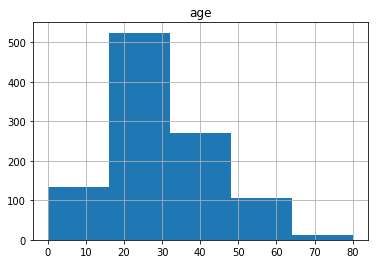

In [33]:
histogram = titanic.hist(bins=5)

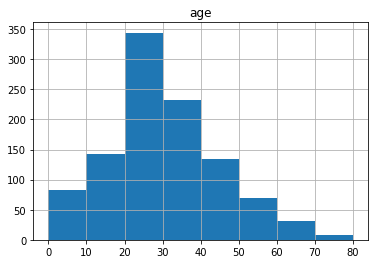

In [34]:
histogram = titanic.hist( bins=list(range(0,81,10)) )

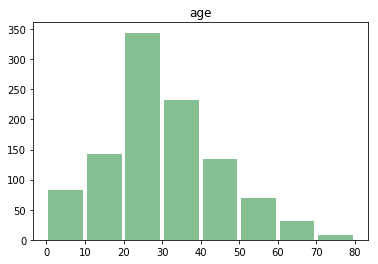

In [36]:
histogram = titanic.hist( column='age', bins=list(range(0,81,10)), grid=False, color='#86bf91', rwidth=0.9 )

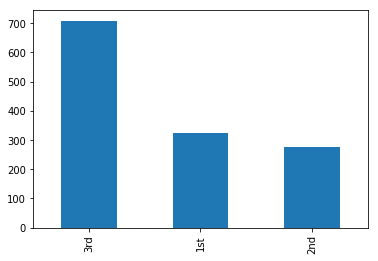

In [40]:
class_counts_bar = titanic['class'].value_counts().plot.bar()

In [42]:
# this doesn't make sense to do as a visualization
age_counts_bar = titanic['age'].value_counts().sort_index().plot.bar()